#### Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Data Preprocessing

In [3]:
fldr="drive/My Drive/Face_data_based_ml/UTKFace"

In [5]:
import os
files=os.listdir(fldr)


In [6]:
import cv2
ages=[]
genders=[]
images=[]

for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=fldr+'/'+fle
  print(total)
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)

  



Streaming output truncated to the last 5000 lines.
drive/My Drive/Face_data_based_ml/UTKFace/3_1_2_20161219190118219.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/3_1_2_20161219190200060.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/3_1_2_20161219204943868.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/3_1_2_20161219205359589.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/3_1_2_20161219212214190.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/3_1_3_20161219230204712.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/3_1_3_20161219230259272.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/3_1_3_20161220220619722.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/40_0_0_20170104170254385.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/40_0_0_20170104201002201.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/40_0_0_20170104204559660.jpg.chip.jpg
drive/My Drive/Face_data_based_ml/UTKFace/40_0_0_20170104204609691.jpg.chip.j

In [14]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

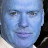

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[24])

In [21]:
print(ages[24])
print(genders[24])

62
0


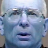

In [49]:
cv2_imshow(images[53])

In [50]:
print(ages[53])
print(genders[53])

67
0


In [18]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [19]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'gender.npy',genders_f)
np.save(fldr+'age.npy',ages_f)

Male = 0
Female= 1

In [35]:

values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[4372 5407    1]


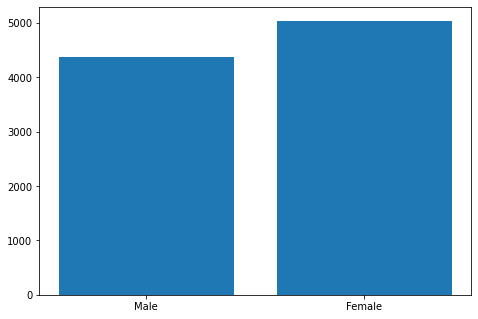

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[4372,5047]
ax.bar(gender,values)
plt.show()

In [37]:

values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1112  475  284  260  180  114  126  236  159  140   63  106   75  137
  143  212  103  181   58  103  136  139   92  191  156  279  126  145
  150  109   97  141   46   87  121  112   94   91  136   85   56   84
   52   27   77   61   70   64   99  105   62  133  133  106   52  132
   60   96   59  137   50   76   47   29  113   54   47   58   45   53
   22   70   31   16   87   35   19   30   16   71   10   29    7   11
  130   23    4   17   16   56    1   13    3    3   16    2    2    1
    2]


In [40]:
val=values.tolist()
cnt=counts.tolist()

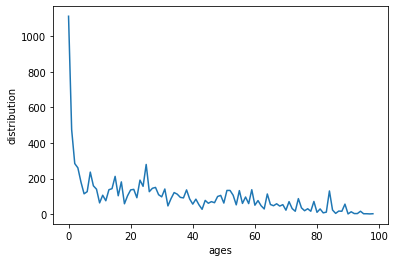

In [41]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [43]:
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [46]:
images_f_2=images_f/255

In [47]:
labels_f=np.array(labels)

In [48]:
images_f_2.shape

(9780, 48, 48, 3)

In [51]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)

In [53]:
Y_train[0:5]

array([[[36],
        [ 0]],

       [[50],
        [ 0]],

       [[65],
        [ 0]],

       [[ 3],
        [ 0]],

       [[25],
        [ 1]]])

In [60]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [62]:
Y_train_2[0][0:5]

array([[0],
       [0],
       [0],
       [0],
       [1]])

In [63]:
Y_train_2[1][0:5]

array([[36],
       [50],
       [65],
       [ 3],
       [25]])

### Model

In [141]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model


In [142]:
Model=model((48,48,3))

In [143]:
Model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 48, 48, 32)   896         input_14[0][0]                   
__________________________________________________________________________________________________
dropout_64 (Dropout)            (None, 48, 48, 32)   0           conv2d_42[0][0]                  
__________________________________________________________________________________________________
activation_42 (Activation)      (None, 48, 48, 32)   0           dropout_64[0][0]                 
___________________________________________________________________________________________

#### Training

In [144]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [146]:
fle_s='Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [147]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=500,callbacks=[callback_list])

Epoch 1/500
114/115 [============================>.] - ETA: 0s - loss: 21.9847 - sex_out_loss: 0.7195 - age_out_loss: 21.0573 - sex_out_accuracy: 0.5430 - age_out_accuracy: 0.1105
Epoch 00001: val_loss improved from inf to 20.79100, saving model to Age_sex_detection.h5
115/115 [==============================] - 1s 13ms/step - loss: 21.9723 - sex_out_loss: 0.7194 - age_out_loss: 21.0452 - sex_out_accuracy: 0.5427 - age_out_accuracy: 0.1104 - val_loss: 20.7910 - val_sex_out_loss: 0.6851 - val_age_out_loss: 19.9257 - val_sex_out_accuracy: 0.5436 - val_age_out_accuracy: 0.1202
Epoch 2/500
113/115 [============================>.] - ETA: 0s - loss: 16.9645 - sex_out_loss: 0.6807 - age_out_loss: 16.0838 - sex_out_accuracy: 0.5596 - age_out_accuracy: 0.1061
Epoch 00002: val_loss improved from 20.79100 to 14.18784, saving model to Age_sex_detection.h5
115/115 [==============================] - 1s 11ms/step - loss: 16.9064 - sex_out_loss: 0.6801 - age_out_loss: 16.0261 - sex_out_accuracy: 0.5609

### Evaluation

In [149]:
Model.evaluate(X_test,Y_test_2)

77/77 [==============================] - 0s 4ms/step - loss: 7.5437 - sex_out_loss: 0.3756 - age_out_loss: 6.3955 - sex_out_accuracy: 0.8147 - age_out_accuracy: 0.1202


[7.543742656707764,
 0.37557876110076904,
 6.395535945892334,
 0.8147239089012146,
 0.12024539709091187]

In [150]:
pred=Model.predict(X_test)

In [153]:
pred[1]

array([[ 2.448493 ],
       [66.19837  ],
       [ 1.0033535],
       ...,
       [ 2.4610648],
       [55.771957 ],
       [ 9.427577 ]], dtype=float32)

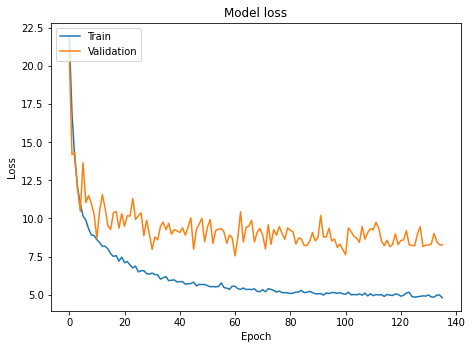

In [160]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For Gender

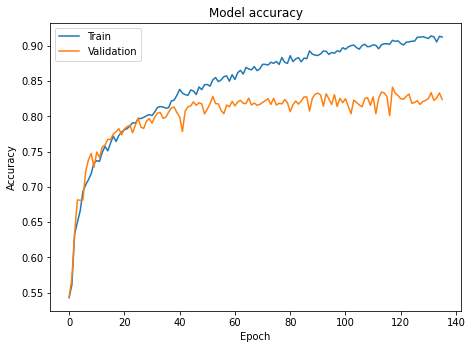

In [158]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For age

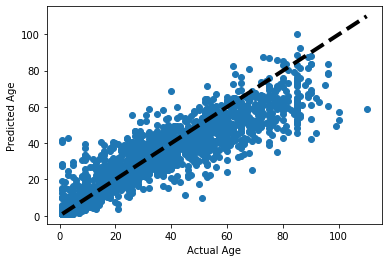

In [155]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

#### For Gender

In [185]:
i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1


In [186]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report 

In [187]:

report=classification_report(Y_test_2[0], Pred_l)

In [188]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1116
           1       0.79      0.90      0.84      1329

    accuracy                           0.81      2445
   macro avg       0.82      0.81      0.81      2445
weighted avg       0.82      0.81      0.81      2445



In [190]:

results = confusion_matrix(Y_test_2[0], Pred_l)

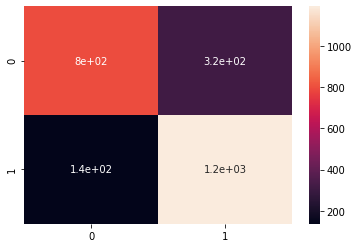

In [191]:
import seaborn as sns

sns.heatmap(results, annot=True)

In [203]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Sex: "+ sex_f[sex])



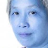

Predicted Age: 64
Predicted Sex: Female


In [204]:
test_image(57,images_f,images_f_2,Model)

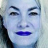

Predicted Age: 76
Predicted Sex: Female


In [205]:
test_image(137,images_f,images_f_2,Model)

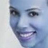

Predicted Age: 31
Predicted Sex: Female


In [206]:
test_image(502,images_f,images_f_2,Model)

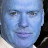

Predicted Age: 60
Predicted Sex: Male


In [208]:
test_image(24,images_f,images_f_2,Model)